In [1]:
"""
Created on Thu Jul 17 18:46:23 2025

@author: huzefa
"""

'\nCreated on Thu Jul 17 18:46:23 2025\n\n@author: huzefa\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
cars_data=pd.read_csv('../Datasets/cars_sampled.csv' )

In [5]:
cars=cars_data.copy()
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [6]:
cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.precision',2)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [7]:
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [8]:
np.set_printoptions(suppress=True)

In [9]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)
cars.drop_duplicates(keep='first',inplace=True)

In [10]:
cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]

In [11]:
cars['monthOfRegistration']/=12
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

In [12]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

In [13]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)   
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]                    

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [14]:
cars_omit=cars.dropna(axis=0)
cars_omit.to_csv('omitted_data_cars_sampled.csv')

In [15]:
cars_omit_data=pd.read_csv('omitted_data_cars_sampled.csv')
cars_omit_data=cars_omit_data.drop('Unnamed: 0',axis=1)

In [16]:
x1 = cars_omit_data.filter(['powerPS','kilometer','Age'],axis=1)
y1= cars_omit_data.filter(['price'],axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 3) (9866, 3) (23018, 1) (9866, 1)


In [18]:
def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)

    model = LinearRegression()

    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)

    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)     
        model.fit(data[x_features], data[y_featue])
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))

    return result

In [19]:
def rmse(test_y,predicted_y):
    rmse_test=np.sqrt(mean_squared_error(test_y, predicted_y))
    #for base rmse
    base_pred = np.repeat(np.mean(test_y), len(test_y))
    rmse_base = np.sqrt(mean_squared_error((test_y), base_pred))
    values={'RMSE-test from model':rmse_test,'Base RMSE':rmse_base}
    return values

In [20]:
X_train2 = sm.add_constant(X_train)
model_lin1 = sm.OLS(y_train, X_train2)
results1=model_lin1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     9978.
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:50:44   Log-Likelihood:            -2.3087e+05
No. Observations:               23018   AIC:                         4.617e+05
Df Residuals:                   23014   BIC:                         4.618e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.057e+04    155.533     67.928      0.0

In [21]:
X_test=sm.add_constant(X_test)
cars_predictions_lin1_test = results1.predict(X_test)

In [22]:
vif_val=calculateVIF(X_train)
vif_val=vif_val.transpose()

/var/folders/4n/qtwztn957tq_p6qm84yxsr740000gn/T/ipykernel_6407/2280496214.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result.fillna(0)


In [23]:
rmse(y_test,cars_predictions_lin1_test)

{'RMSE-test from model': 5331.188160037265, 'Base RMSE': 8189.787602929657}

In [24]:
cars_predictions_lin1_train = results1.predict(X_train2)

In [25]:
residuals=y_train.iloc[:,0]-cars_predictions_lin1_train

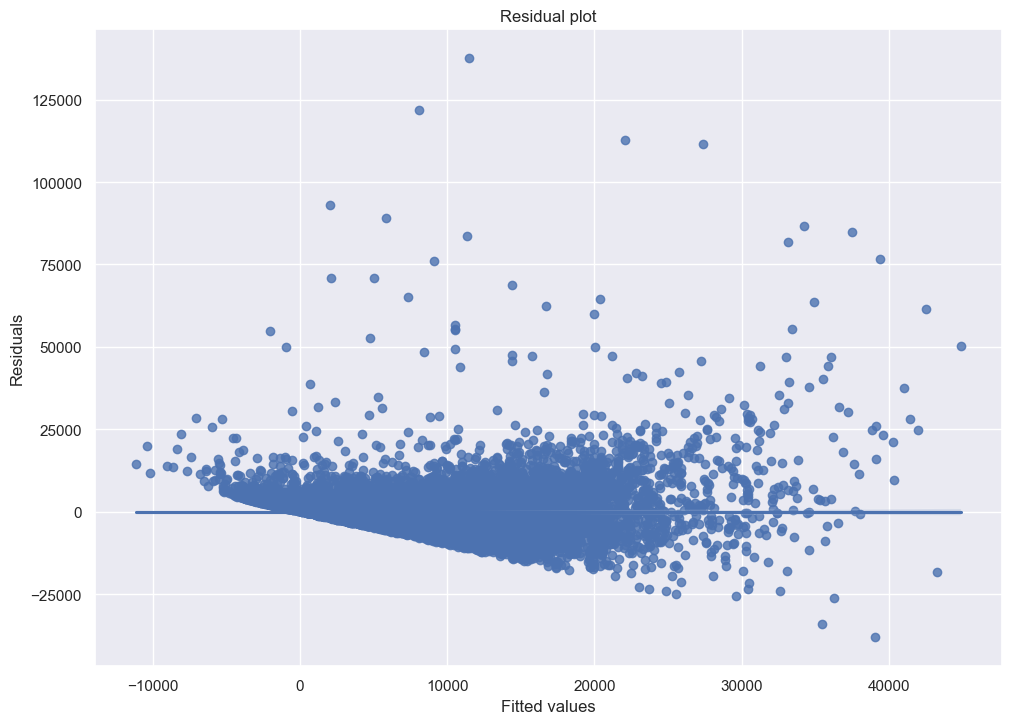

In [26]:
sns.regplot(x=cars_predictions_lin1_train,y=residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title('Residual plot')
plt.show()

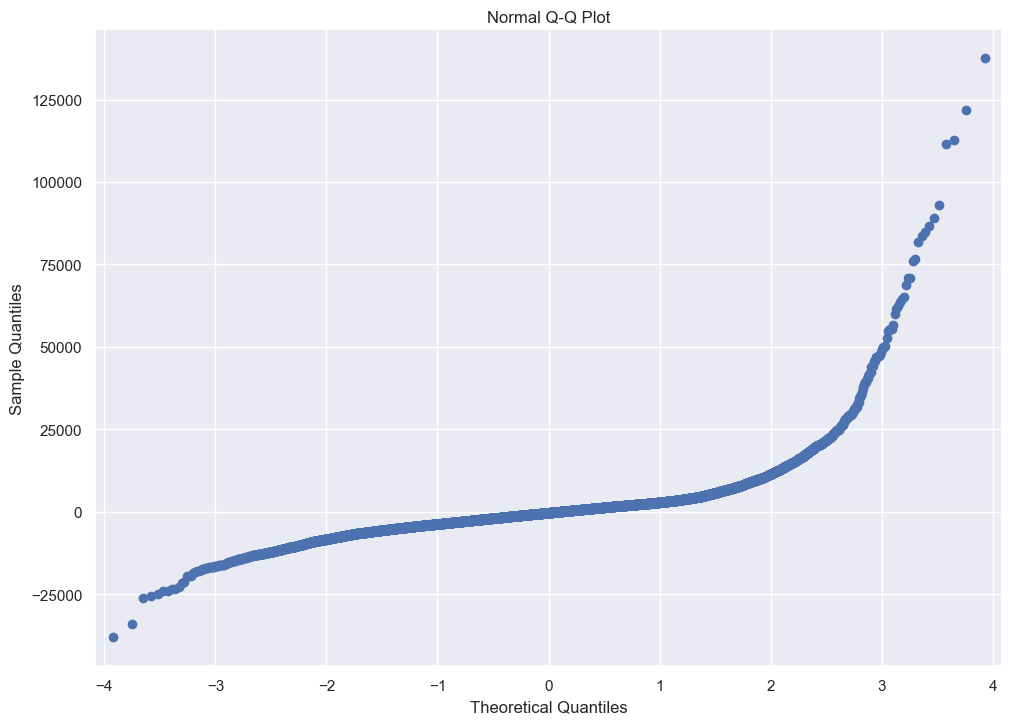

In [27]:
sm.qqplot(residuals)
plt.title("Normal Q-Q Plot")
plt.show()

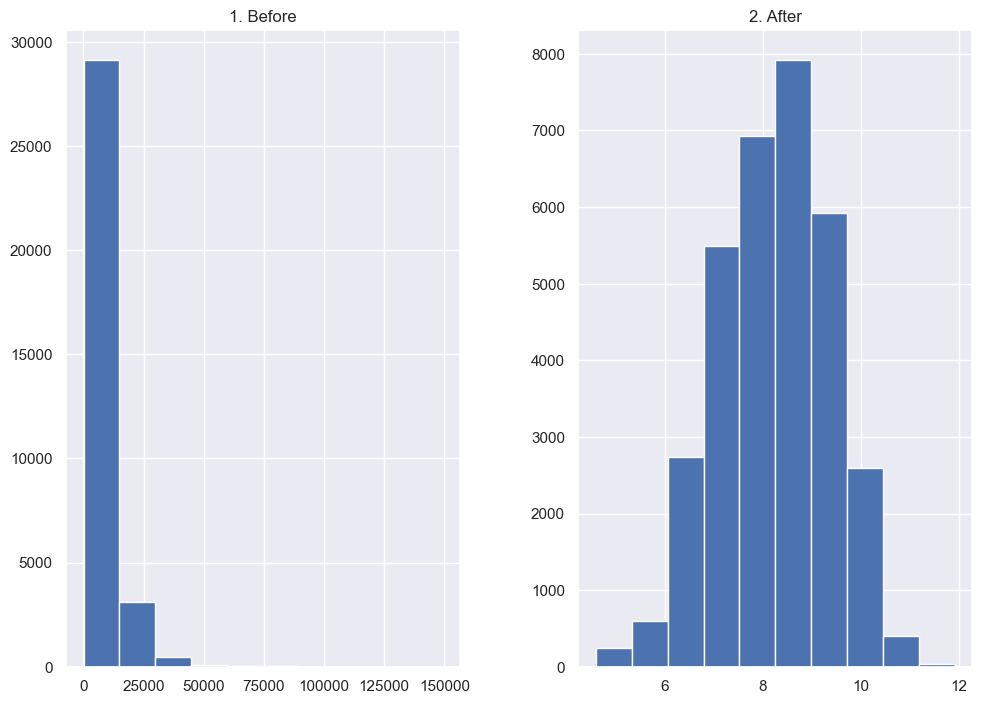

In [28]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y1.iloc[:,0], "2. After":np.log(y1.iloc[:,0])})
prices.hist()
plt.show()

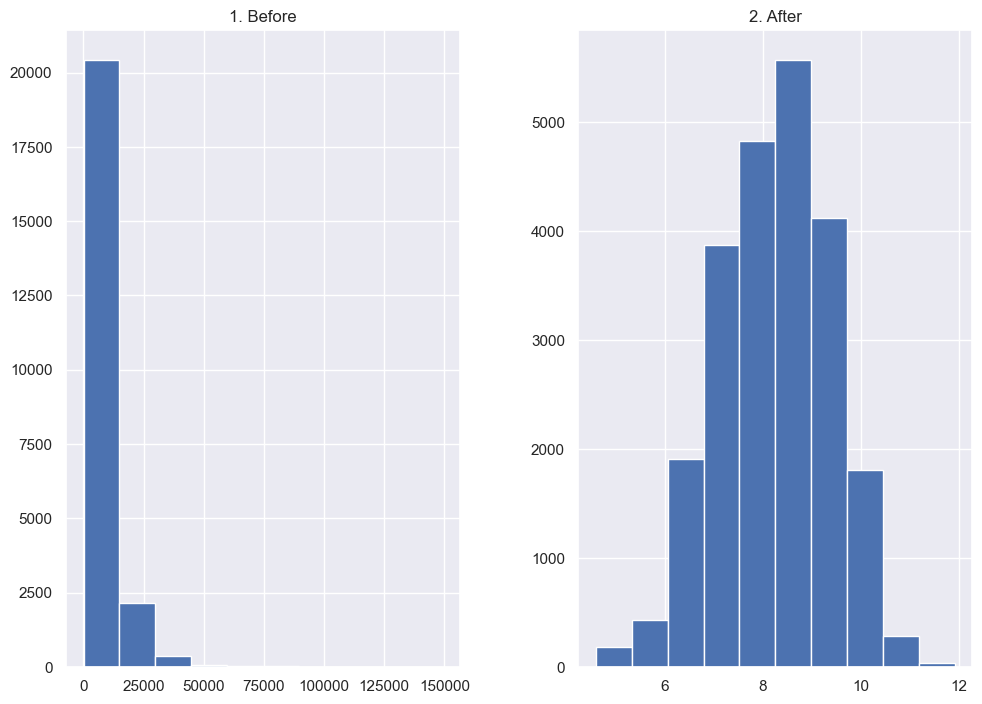

In [29]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y_train.iloc[:,0], "2. After":np.log(y_train.iloc[:,0])})
prices.hist()
plt.show()

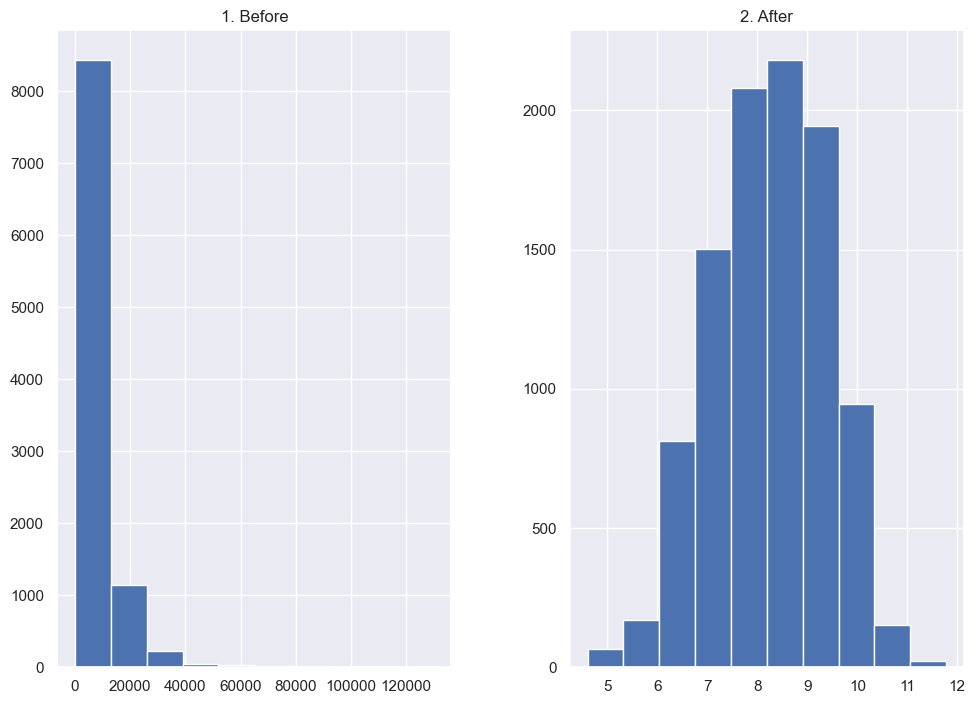

In [30]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y_test.iloc[:,0], "2. After":np.log(y_test.iloc[:,0])})
prices.hist()
plt.show()

In [31]:
y2=np.log(y1)
y_train_log,y_test_log=train_test_split(y2, test_size=0.3, random_state = 3)

In [32]:
X_train2 = sm.add_constant(X_train)
model_lin2 = sm.OLS(y_train_log, X_train2)
results2=model_lin2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 1.295e+04
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:50:45   Log-Likelihood:                -24217.
No. Observations:               23018   AIC:                         4.844e+04
Df Residuals:                   23014   BIC:                         4.847e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0923      0.020    463.346      0.0

In [33]:
X_test=sm.add_constant(X_test)
cars_predictions_lin2_test = results2.predict(X_test)

In [34]:
def rmse_log(test_y,predicted_y):
    t1=np.exp(test_y)
    t2=np.exp(predicted_y)
    rmse_test=np.sqrt(mean_squared_error(t1,t2))
    
    #for base rmse
    base_pred = np.repeat(np.mean(t1), len(t1))
    rmse_base = np.sqrt(mean_squared_error(t1, base_pred))
    values={'RMSE-test from model':rmse_test,'Base RMSE':rmse_base}
    return values

In [35]:
# Model evaluation on predicted and test 
rmse_log(y_test_log,cars_predictions_lin2_test)

{'RMSE-test from model': 9016.233744413968, 'Base RMSE': 8189.787602929656}

In [36]:
cars_predictions_lin2_train = results2.predict(X_train2)

In [37]:
residuals=y_train_log.iloc[:,0]-cars_predictions_lin2_train

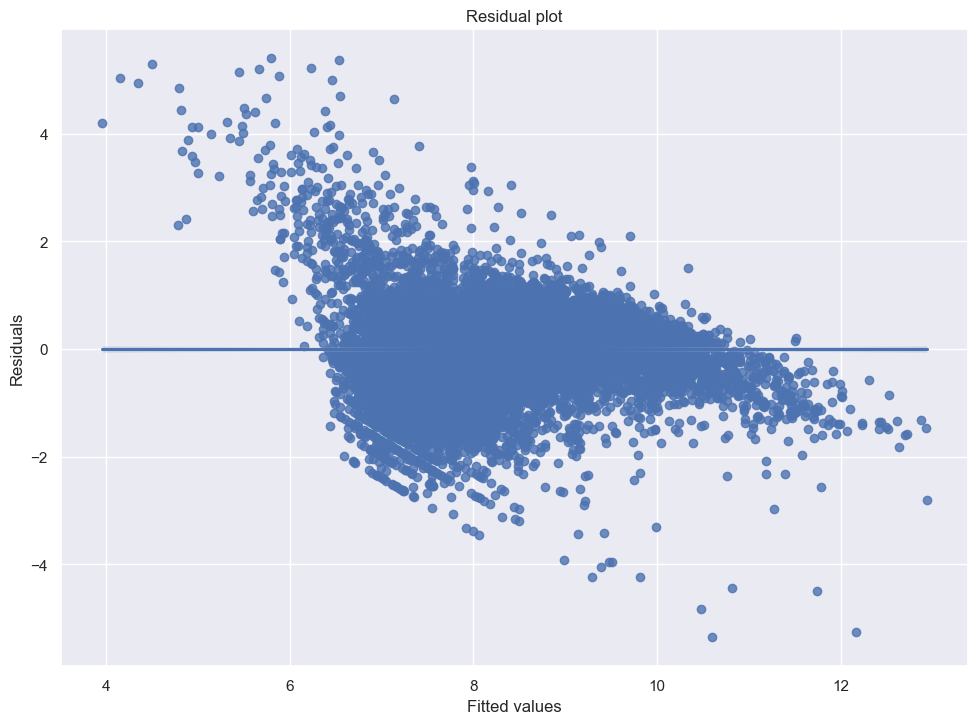

In [38]:
# Residual plot
sns.regplot(x=cars_predictions_lin2_train,y=residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title('Residual plot')
plt.show()

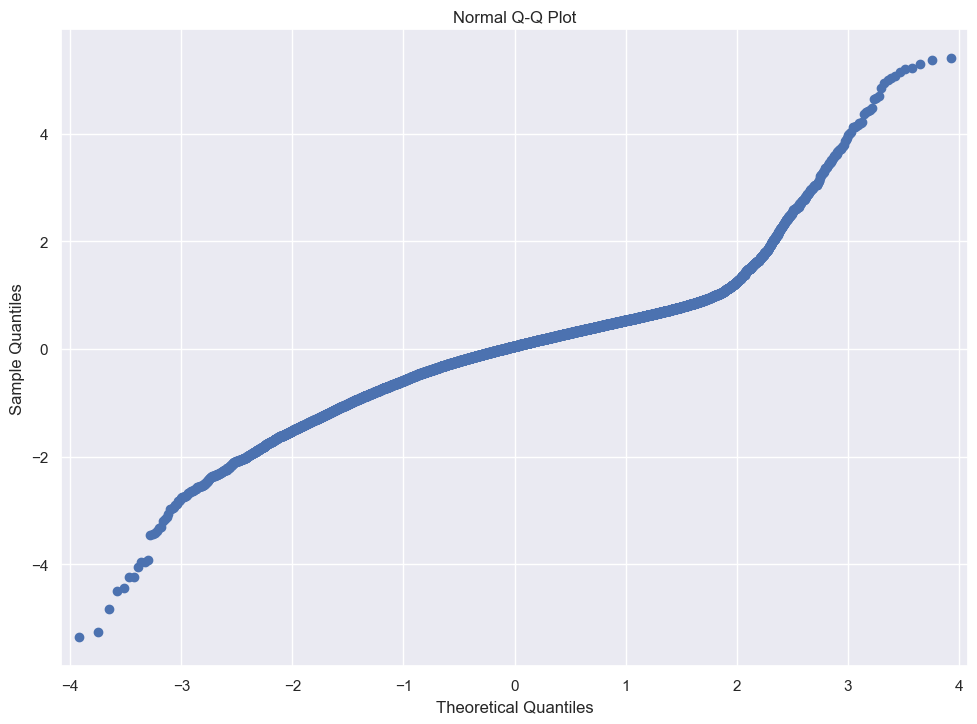

In [39]:
# QQ plot
sm.qqplot(residuals)
plt.title("Normal Q-Q Plot")
plt.show()

In [40]:
x1 = cars_omit_data.drop(['price','model','brand'], axis='columns', inplace=False)
x1=pd.get_dummies(x1,drop_first=True) 
X_train, X_test = train_test_split(x1,test_size=0.3, random_state = 3)

In [41]:
print(type(y_train_log))
# If it's a DataFrame, convert to a Series:
# Ensure y is a Series and numeric
if isinstance(y_train_log, pd.DataFrame):
    y_train_log = y_train_log.iloc[:, 0]
y_train_log = pd.to_numeric(y_train_log, errors='coerce')

<class 'pandas.core.frame.DataFrame'>


In [42]:
# Remove rows with any NaNs
mask = X_train2.notnull().all(axis=1) & y_train_log.notnull()
X_train2_clean = X_train2[mask]
y_train_log_clean = y_train_log[mask]

In [43]:
# Fit the model
model_lin3 = sm.OLS(y_train_log_clean, X_train2_clean)
results3 = model_lin3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 1.295e+04
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:50:46   Log-Likelihood:                -24217.
No. Observations:               23018   AIC:                         4.844e+04
Df Residuals:                   23014   BIC:                         4.847e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0923      0.020    463.346      0.0

In [44]:
# First, ensure you add the constant to the test data
X_test_simple = sm.add_constant(X_test)

In [45]:
# Now select only the columns used in the model
X_test_simple = X_test_simple[['const', 'powerPS', 'kilometer', 'Age']]

In [46]:
cars_predictions_lin3_test = results3.predict(X_test_simple)

In [47]:
# Model evaluation on predicted and test 
rmse_log(y_test_log,cars_predictions_lin3_test)

{'RMSE-test from model': 9016.233744413968, 'Base RMSE': 8189.787602929656}

In [48]:
cars_predictions_lin3_train = results3.predict(X_train2)

In [49]:
residuals = y_train_log - cars_predictions_lin3_train

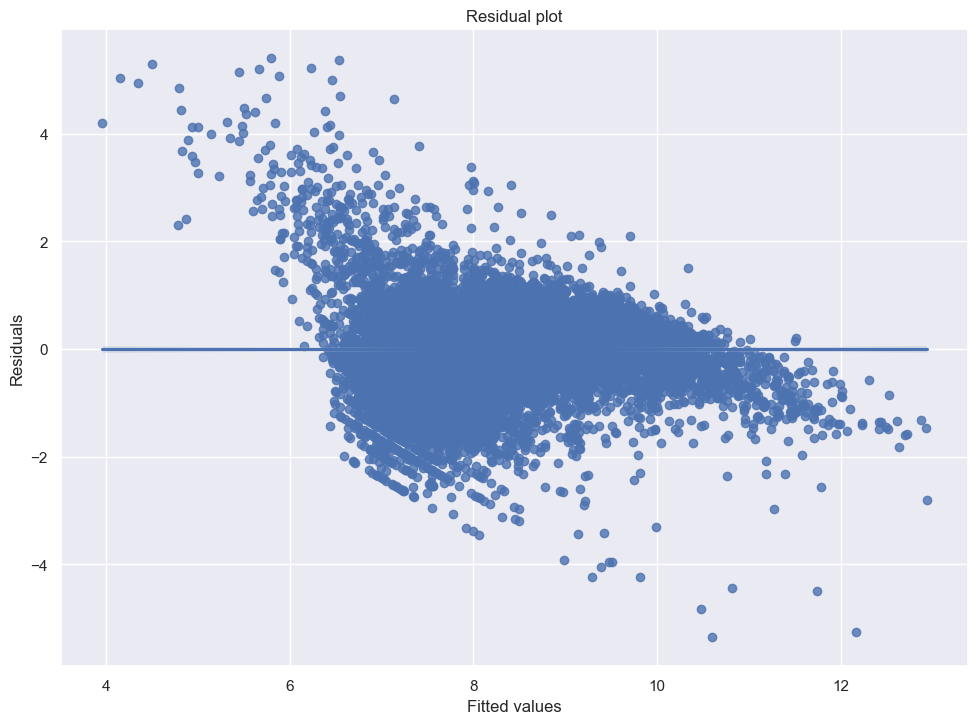

In [50]:
# Residual plot
sns.regplot(x=cars_predictions_lin3_train,y=residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title('Residual plot')
plt.show()

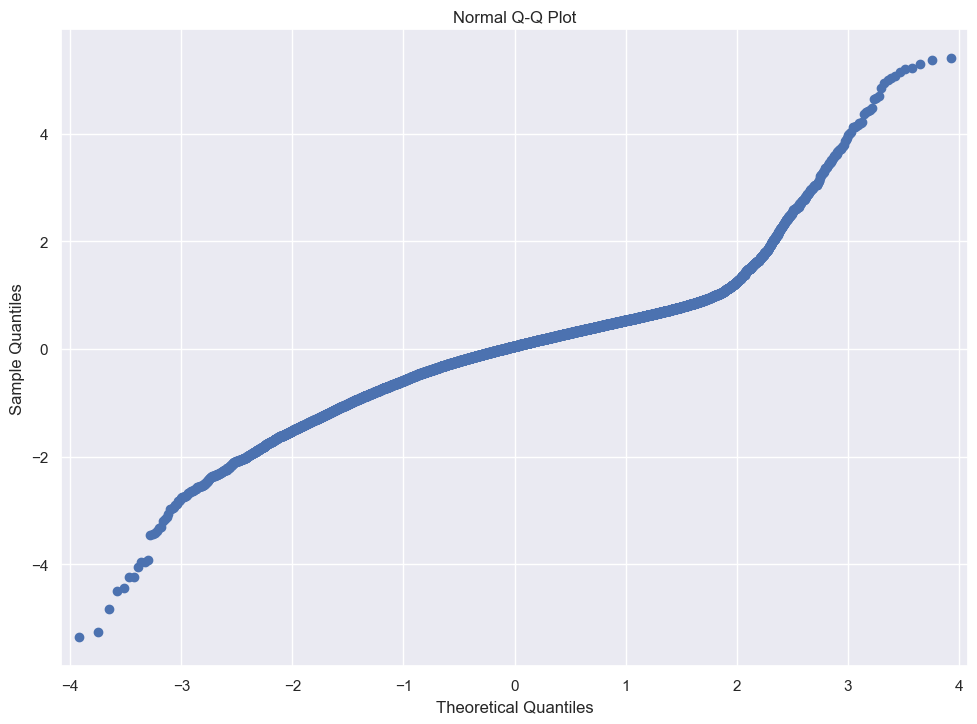

In [51]:
# QQ plot
sm.qqplot(residuals)
plt.title("Normal Q-Q Plot")
plt.show()